### **_CODSOFT INTERNSHIP_**

Task 1: Titanic Survival Prediction Model

Author: Vaibhav Rakshe

Aim: To create a machine learning model in order to predict the survivalance of Titanic passengers.

#### **_PROJECT INTRODUCTION_**

The Titanic Survival Prediction Model project aims to analyze and predict the survival outcomes of passengers aboard the RMS Titanic using machine learning techniques. By leveraging historical passenger data such as age, gender, class, and fare, the project builds a predictive model to estimate the likelihood of survival. This analysis not only provides insights into the factors that influenced survival rates but also serves as a valuable exercise in data preprocessing, feature engineering, and model evaluation within the realm of data science.

## **_GETTING STARTED!!_**

### **_Exploratory Data Analysis_**

#### *Import Required Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Importing dataset to work upon
titanic_test = pd.read_csv('titanic.csv')
# Display top five records
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking dimentions
titanic_test.shape

(891, 12)

In [4]:
# Extracting information from data
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Identifying missing values
titanic_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Dropping column 'cabin'
tit_test = titanic_test.drop(columns = 'Cabin', axis = 1)

In [12]:
# Replacement of missing values in 'Age' Column
tit_test ['Age'].fillna(titanic_test['Age'].mean(), inplace = True)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8204\2263531689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tit_test ['Age'].fillna(titanic_test['Age'].mean(), inplace = True)


In [13]:
tit_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
# Finding MODE value of 'Embark'
print(tit_test['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [20]:
# Drop rows with missing 'Embarked' values
tit_test.dropna(subset=['Embarked'], inplace=True)

In [26]:
# Ensure that there isn't any null value
tit_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
# Data Analysis of the Titanic dataset
titanic_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# Analyzing number of survived people
tit_test['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [29]:
# Visualizing the Data
sns.set()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8204\4228726876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data = tit_test, palette='viridis')
C:\Users\vaibh\AppData\Local\Temp\ipykernel_8204\4228726876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data = tit_test, palette='viridis')


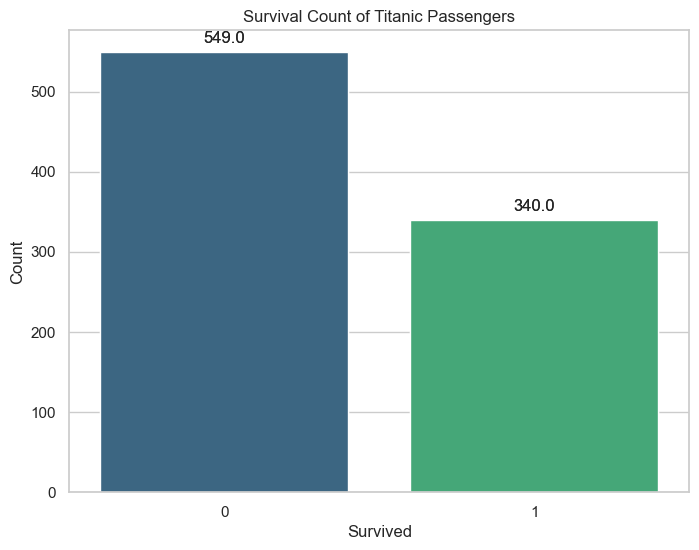

In [41]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the countplot
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data = tit_test, palette='viridis')

# Add title and labels
plt.title('Survival Count of Titanic Passengers', fontsize=12)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on the bars
ax = sns.countplot(x='Survived', data = tit_test, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.show()

**_Here we can conclude that out of 891 people, only 340 managed to survive while rest of 549 couldn't!!_**

#### **Analysis of Survival by Gender**

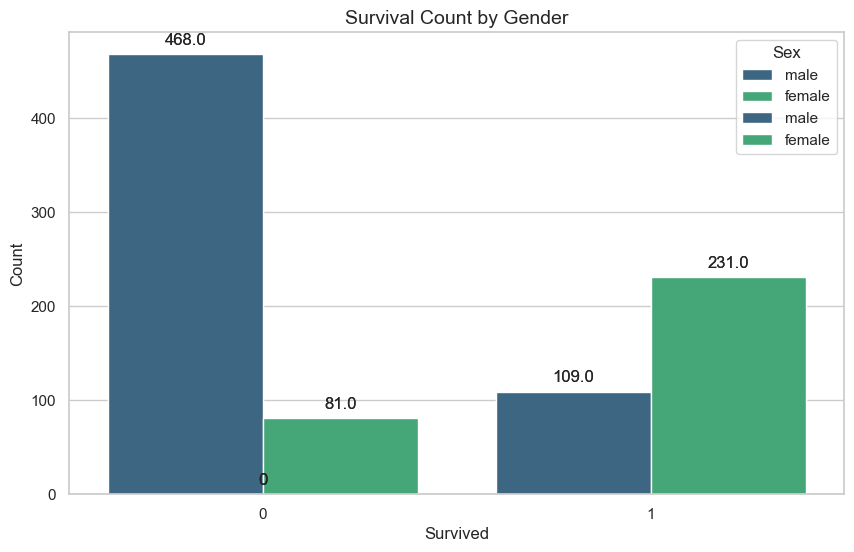

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data = tit_test, palette='viridis')

plt.title('Survival Count by Gender', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on the bars
ax = sns.countplot(x='Survived', hue='Sex', data = tit_test, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

#### **_From above analysis we can dectate that there are 468 Males and 81 Females who hasn't survived meanwhile there are 109 Males and 231 Females who Survived through the crysis.._**
#### **_Final conclusion says that more females were able to survive compared to males.._**

#### **Analysis of Survival by Passenger Class**

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8204\2208638335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data = tit_test, palette='viridis')


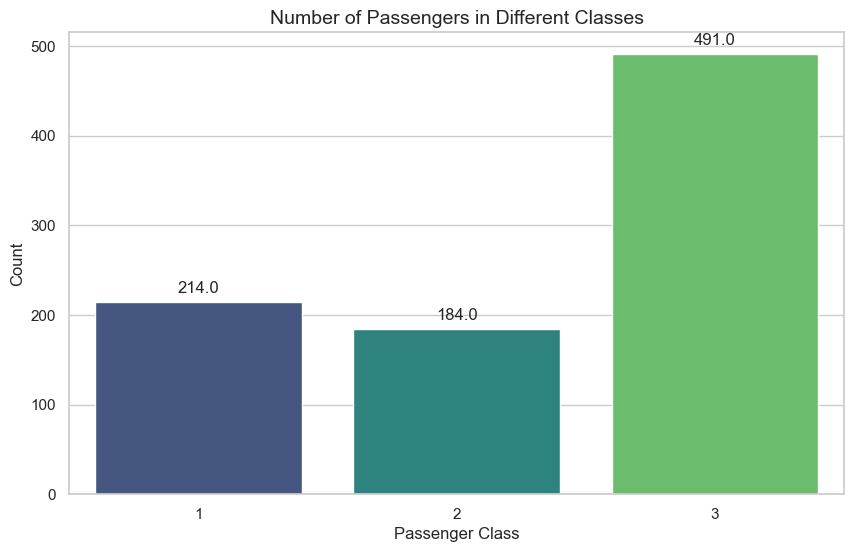

In [51]:
# Visualizing number of passengers in different classes
# Set the style of the plot
sns.set_style("whitegrid")

# Create the countplot for passenger classes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', data = tit_test, palette='viridis')

# Add title and labels
ax.set_title('Number of Passengers in Different Classes', fontsize=14)
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add value labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    
plt.show()

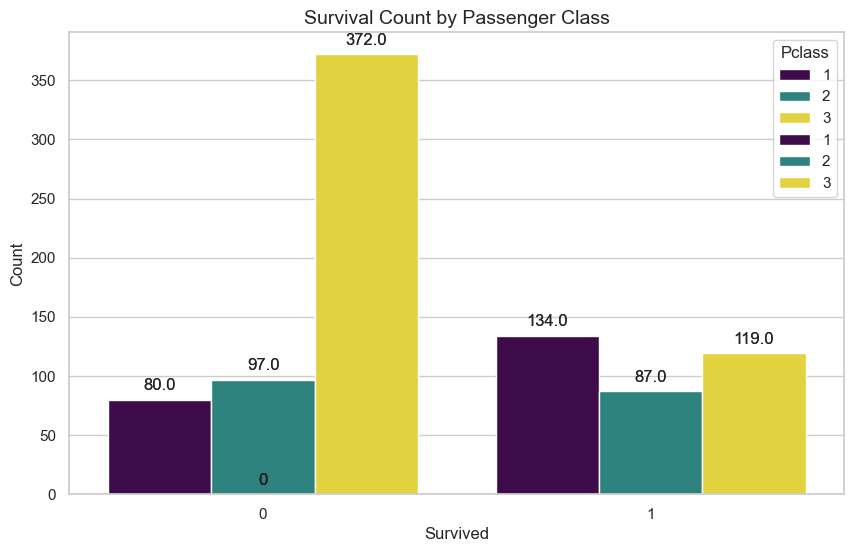

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data = tit_test, palette='viridis')

plt.title('Survival Count by Passenger Class', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on the bars
ax = sns.countplot(x='Survived', hue='Pclass', data = tit_test, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()


#### **_From the analysis of survival by passenger class, it is evident that passengers from the third class lost their lives the most, followed by those from the second class. In contrast, among the survivors, first-class passengers had the highest survival rate, followed by those from the third and second classes._**
#### **_This suggests that passenger class significantly influenced survival chances on the Titanic._**


In [53]:
# Encoding catergorical columns into numerical values
tit_test['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [56]:
tit_test['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [57]:
tit_test.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_8204\350515183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tit_test.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)


In [58]:
tit_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [60]:
X = tit_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = tit_test['Survived']

In [61]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         1
1         1    2  38.000000      1      0  71.2833         2
2         3    2  26.000000      0      0   7.9250         1
3         1    2  35.000000      1      0  53.1000         1
4         3    1  35.000000      0      0   8.0500         1
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         1
887       1    2  19.000000      0      0  30.0000         1
888       3    2  29.699118      1      2  23.4500         1
889       1    1  26.000000      0      0  30.0000         2
890       3    1  32.000000      0      0   7.7500         3

[889 rows x 7 columns]


In [62]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(889, 7) (711, 7) (178, 7)


In [65]:
tit_test = pd.get_dummies(X, columns=['Sex'], drop_first=True)

#### **_Model Training using Logistic Regression_**

In [66]:
model = LogisticRegression(random_state = 0)

#Training model
model.fit(X_train, Y_train)

C:\Users\vaibh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [67]:
# Evaluation of the Model
# Accuracy Score
X_train_prediction = model.predict(X_train)

In [68]:
print(X_train_prediction)

[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 

In [69]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)

Accuracy score of training data =  0.8059071729957806


In [70]:
print(Y_test)

560    0
37     0
615    1
170    0
69     0
      ..
377    0
90     0
81     1
592    0
870    0
Name: Survived, Length: 178, dtype: int64


In [74]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate > 0.5:
    print("Congratulations! Most of them survived!!.")
else:
    print("Sorry to say, but majority of people failed to survive!!")

Sorry to say, but majority of people failed to survive!!
